In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
import networkx as nx

## Reading the data

In [5]:
chunks = pd.read_json("arxiv-metadata-oai-snapshot.json", lines=True, chunksize=10000)
data = pd.concat(chunks, ignore_index=True)

In [6]:
data.shape

(2639143, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639143 entries, 0 to 2639142
Data columns (total 14 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   submitter       object
 2   authors         object
 3   title           object
 4   comments        object
 5   journal-ref     object
 6   doi             object
 7   report-no       object
 8   categories      object
 9   license         object
 10  abstract        object
 11  versions        object
 12  update_date     object
 13  authors_parsed  object
dtypes: object(14)
memory usage: 281.9+ MB


## Task 1.1

In [11]:
data.loc[:,"categories"].head(20)

0                hep-ph
1         math.CO cs.CG
2        physics.gen-ph
3               math.CO
4       math.CA math.FA
5     cond-mat.mes-hall
6                 gr-qc
7     cond-mat.mtrl-sci
8              astro-ph
9               math.CO
10      math.NT math.AG
11              math.NT
12              math.NT
13      math.CA math.AT
14               hep-th
15               hep-ph
16             astro-ph
17               hep-th
18      math.PR math.AG
19               hep-ex
Name: categories, dtype: object

Multiple categories are seperated by spaces.

In [13]:
categories_series = data['categories'].str.split(expand=True).stack()

I split the categories and make them into series by stacking the columns into a single column.

In [15]:
categories_series

0        0               hep-ph
1        0              math.CO
         1                cs.CG
2        0       physics.gen-ph
3        0              math.CO
                    ...        
2639140  1    cond-mat.supr-con
2639141  0             supr-con
         1    cond-mat.supr-con
2639142  0             supr-con
         1    cond-mat.supr-con
Length: 4517840, dtype: object

Now I can count them using value_counts()

In [18]:
category_counts = categories_series.value_counts()

In [24]:
category_counts

cs.LG       201128
hep-ph      184567
hep-th      170919
quant-ph    156467
cs.CV       143141
             ...  
atom-ph        123
acc-phys        49
plasm-ph        38
ao-sci          17
bayes-an        16
Name: count, Length: 176, dtype: int64

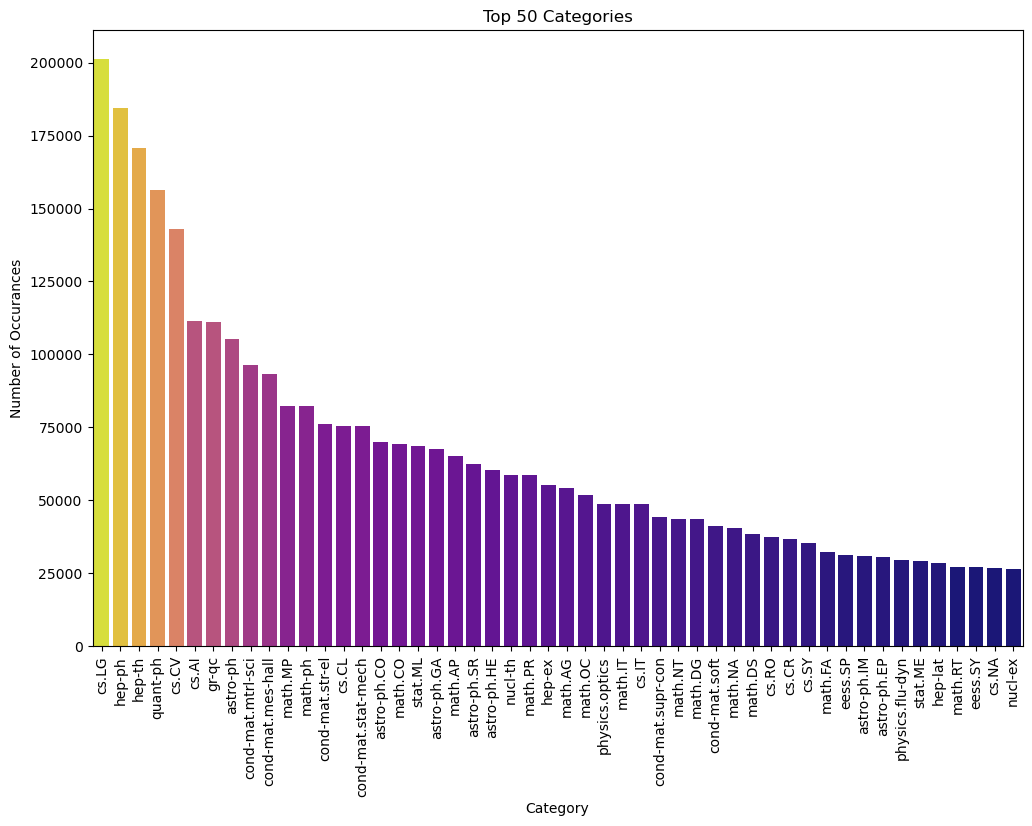

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(data=category_counts.head(50).reset_index(), x='index', y='count', hue='count', legend=False, palette='plasma')
plt.xlabel('Category')
plt.ylabel('Number of Occurances')
plt.title('Top 50 Categories')
plt.xticks(rotation=90)
plt.show()

I only plotted the top 50 most used categories for the graph to be readable.

## Task 1.2

I picked category "cs.IT".

In [44]:
category_to_filter = "cs.IT"

In [46]:
filtered_data = data[data['categories'].str.contains(category_to_filter, na=False)].loc[:,"abstract"]

I filtered the data so now I have the abstracts from the category I picked.

In [59]:
filtered_data

45           In a quantum mechanical model, Diosi, Feldma...
97           Sparse Code Division Multiple Access (CDMA),...
216          Given a multiple-input multiple-output (MIMO...
281          This paper considers the use of punctured co...
303          This paper discusses the benefits of describ...
                                 ...                        
2634269      We show that any stabilizer code over a fini...
2634270      Quantum convolutional codes can be used to p...
2634338      We present a construction of self-orthogonal...
2634339      We address the problems of constructing quan...
2636670      An operator sum representation is derived fo...
Name: abstract, Length: 48658, dtype: object

To get a wordcloud that accurately represents the abstracts I will clean the text first.

In [50]:
text = " ".join(filtered_data)

I will be using the "clean_text.py" file that we used during laboratory classes.

In [48]:
from clean_text import clean_text_pipeline

[nltk_data] Downloading package punkt to C:\Users\Sıla
[nltk_data]     Solak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sıla
[nltk_data]     Solak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sıla
[nltk_data]     Solak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
cleaned_text = clean_text_pipeline(pd.Series([text]))

The function was expecting a series as an input and it also returned series.

In [61]:
cleaned_text.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1 entries, 0 to 0
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
1 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [69]:
cleaned_text.iloc[0][:500]

'quantum mechanical model diosi feldmann kosloff arrive conjecture state limit entropy certain mixture relative entropy system size go infinity conjecture prove paper density matrix first proof analytic use quantum law large number second one clarify relation channel capacity per unit cost classical quantum channel proof lead generalization conjecture sparse code division multiple access cdma variation standard cdma method spreading signature matrix contain relatively small number non zero elemen'

Now I can generate the wordcloud. I wanted to make it bigger for readability.

(-0.5, 799.5, 399.5, -0.5)

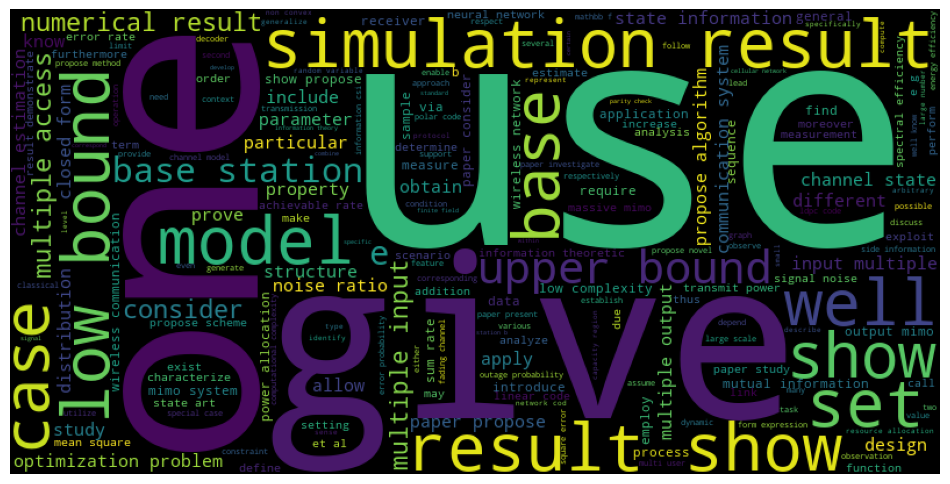

In [104]:
wc = wordcloud.WordCloud(width=800, height=400).generate_from_text(cleaned_text.iloc[0])
plt.figure(figsize=(12, 8))
plt.imshow(wc)
plt.axis('off')

## Task 1.3

These are the the top 5 most commonly used categories.

In [109]:
category_counts.head(5)

cs.LG       201128
hep-ph      184567
hep-th      170919
quant-ph    156467
cs.CV       143141
Name: count, dtype: int64

In [112]:
top_5_categories = category_counts.head(5).index.tolist()

In [116]:
top5_data = data[data['categories'].isin(top_5_categories)]

In [118]:
top5_abstracts = clean_text_pipeline(top5_data['abstract'])

In [121]:
top5_abstracts.head(5)

0     fully differential calculation perturbative qu...
14    pure spinor formulation ten dimensional supers...
15    work evaluate lifetime doubly charm baryon xi_...
17    give prescription compute callias index use re...
28    xqm quark emit goldstone boson flavor symmetry...
Name: abstract, dtype: object

Now I can use the clean abstracts to count the words seperately for each top 5 category.

In [128]:
top_words_by_category = {} #Initialize a dictionary.

for category in top_5_categories:
    category_data = top5_data[top5_data['categories'] == category] #Get the specific category.
    category_abstracts = top5_abstracts[category_data.index] #Filter abstracts for the category
    all_words = category_abstracts.str.split().explode() #Split words by space.
    word_count = all_words.value_counts() #Get the frequency of each word.
    top_words = word_count.head(3)
    top_words_by_category[category] = top_words #Put results in dictionary.

for category, words in top_words_by_category.items():
    print(f"Category: {category}")
    for word, count in words.items():
        print(f"  Word: {word}, Count: {count}")


Category: cs.LG
  Word: model, Count: 37650
  Word: data, Count: 27641
  Word: learn, Count: 22486
Category: hep-ph
  Word: model, Count: 80165
  Word: mass, Count: 61991
  Word: quark, Count: 41936
Category: hep-th
  Word: theory, Count: 78901
  Word: field, Count: 49519
  Word: n, Count: 41495
Category: quant-ph
  Word: quantum, Count: 172441
  Word: state, Count: 103175
  Word: system, Count: 53754
Category: cs.CV
  Word: image, Count: 121274
  Word: model, Count: 97639
  Word: method, Count: 95553


## Task 2

I chose to represent the co-author interactions between the authors.

In [172]:
data['authors_parsed']

0          [[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...
1                   [[Streinu, Ileana, ], [Theran, Louis, ]]
2                                         [[Pan, Hongjun, ]]
3                                        [[Callan, David, ]]
4          [[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]
                                 ...                        
2639138    [[Prozorov, R., ], [Konczykowski, M., ], [Schm...
2639139    [[Choudhury, Durga P., , Physics Department, N...
2639140    [[Willemsen, Balam A., , Physics Department,\n...
2639141    [[Hasegawa, Yasumasa, , Himeji Institute of Te...
2639142    [[Enomoto, Naoki, , Okayama Univ.], [Ichioka, ...
Name: authors_parsed, Length: 2639143, dtype: object

I want to get all the 2 author combinations from every row.

In [58]:
from itertools import combinations

In [190]:
author_pairs = [] 
for authors in data['authors_parsed']:
    authors_list = [author[0] for author in authors]  #Getting just the surnames
    if len(authors_list) > 1:
        author_pairs.extend(combinations(authors_list, 2))  #Generating all combinations of pairs

MemoryError: 

I ran out of memory trying to work on the whole dataset.

In [192]:
flattened_authors = pd.Series([author[0] for authors in data['authors_parsed'] for author in authors])

author_publication_count = flattened_authors.value_counts()

After result from this I noticed that only surnames are not enough to differentiate between authors so I will take the surname and name.

In [7]:
flattened_authors = pd.Series([
    f"{author[0].strip()} {author[1].strip()}" for authors in data['authors_parsed'] for author in authors
])
author_publication_count = flattened_authors.value_counts()

In [13]:
author_publication_count

Zhang Y.                3022
Wang Y.                 2145
Liu Yang                2027
Wang J.                 2022
Wang Z.                 1830
                        ... 
Hoth M.                    1
Qu B.                      1
RoozehdarMogaddam R.       1
SepehriJavan N.            1
Derov J. S.                1
Name: count, Length: 1733180, dtype: int64

I decided that I will work with authors who have at least 5 publications.

In [49]:
high_value_authors = author_publication_count[author_publication_count >= 5].index

In [17]:
high_value_authors

Index(['Zhang Y.', 'Wang Y.', 'Liu Yang', 'Wang J.', 'Wang Z.', 'Li Y.',
       'Wang Wei', 'Taniguchi Takashi', 'Watanabe Kenji', 'Liu X.',
       ...
       'Thompson Stephen P.', 'Lhuillier E.', 'Jarosz A.', 'Marago O. M.',
       'Hunter Roger C.', 'Wilson Richard W.', 'Neglia G.', 'Bouwhuis Mieke',
       'Singh Abhishek Narain', 'Plaga Rainer'],
      dtype='object', length=432620)

In [39]:
authors_data = data[data['authors_parsed'].apply(
    lambda authors: any(f"{author[0].strip()} {author[1].strip()}" in high_value_authors for author in authors)
)]

In [41]:
authors_data.shape

(2021491, 14)

This did not decrease the number of rows as much as I needed it to decrease. I will try with increasing the required publication number.

Even when I increased it to 20 the number did not go below 2 million rows.

I decided that all of the authors on a paper should have at least 5 publications before it was any.

In [51]:
authors_data = data[data['authors_parsed'].apply(
    lambda authors: all(f"{author[0].strip()} {author[1].strip()}" in high_value_authors for author in authors)
)]

In [53]:
authors_data.shape

(1547699, 14)

Now there is 1.5 million rows. I will work with this data and try to create the co-author pairs. 

In [60]:
author_pairs = []
for authors in authors_data['authors_parsed']:
    authors_list = [
        f"{author[0].strip()} {author[1].strip()}" for author in authors
    ]
    if len(authors_list) > 1:
        author_pairs.extend(combinations(authors_list, 2))

In [70]:
len(author_pairs)

399205465

In [72]:
G = nx.Graph()

G.add_edges_from(author_pairs)

This took a very long time and I was running out of memory again. I deleted some variables.

Initially I only took the nodes with degree > 5 which means only authors who co-authored with more than 5 authors.

It was taking too long to graph so I decided I will just graph the 100 nodes with the highest degrees so 100 authors who co-authored the most.

In [88]:
top_authors = [node for node, degree in sorted(dict(G.degree()).items(), key=lambda item: item[1], reverse=True)[:100]]
filtered_G = G.subgraph(top_authors)

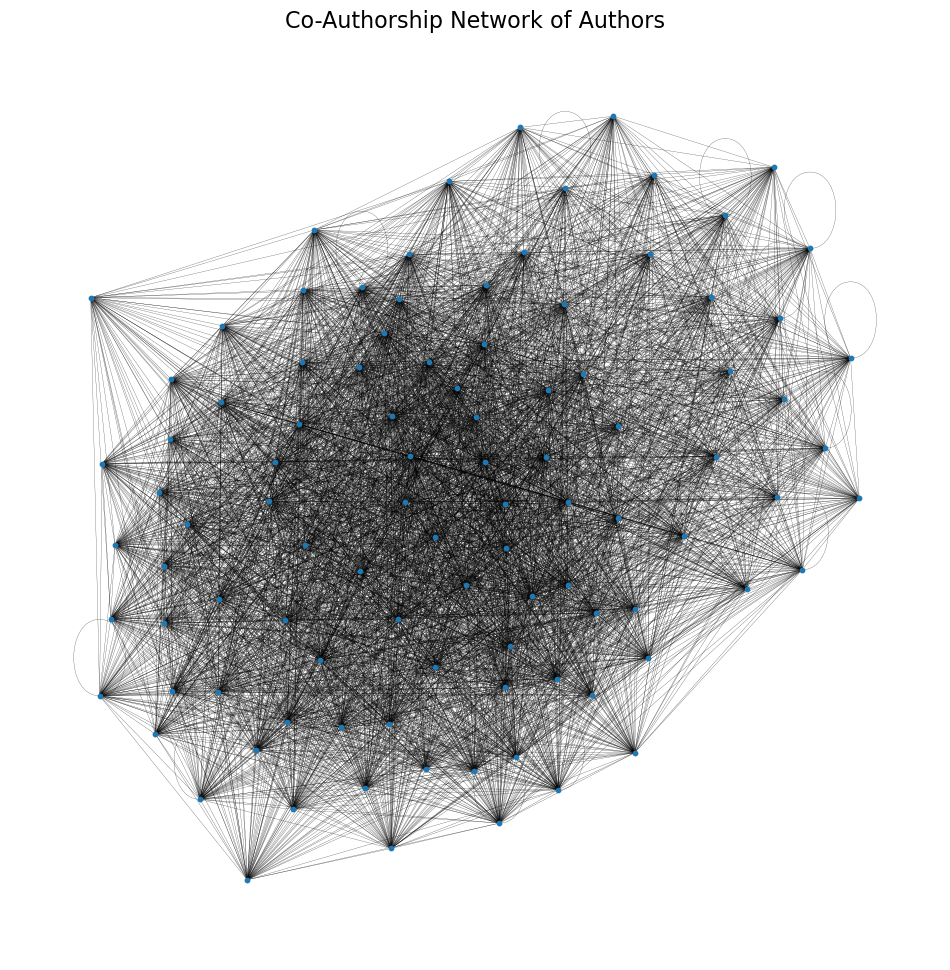

In [90]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(filtered_G, k=0.15) 

nx.draw_networkx_nodes(filtered_G, pos, node_size=10)
nx.draw_networkx_edges(filtered_G, pos, width=0.15)

plt.title('Co-Authorship Network of Authors', fontsize=16)
plt.axis('off')
plt.show()

Now I noticed that some nodes are connected to themselves which is weird. Maybe my approach for getting the surname and name from the 'authors_parsed' caused it or some authors co-authored with  someone of the same surname and inital of their name.